In [5]:
import matplotlib.pyplot as plt
import numpy as np

## Plot predictions

In [4]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from PIL import Image
import glob
import helper

In [6]:
loss_file = open("predictions_paral/pred_loss_dist_paral_fake.txt")

filedata = loss_file.read()
filedata = filedata.replace("bce",",bce")
filedata = filedata.split(",")

val_file = "predictions_paral/inputs_HR29_paral_fake.npy"
pred_file = "predictions_paral/pred_HR29_paral_fake.npy"
label_file = "predictions_paral/labels_HR29_paral_fake.npy"

#val_file = "predictions/inputs_HR29_paral_fake_60.npy"
#pred_file = "predictions/pred_HR29_paral_fake_60.npy"
#label_file = "predictions/labels_HR29_paral_fake_60.npy"



val_images = np.load(val_file)
pred_images = np.load(pred_file)
val_label = np.load(label_file)
pred_images[0,0,:,:,:].shape

input_images_rgb = [helper.reverse_transform(x) for x in val_images[:,0,:3,:,:]]   #new metrics
# Map each channel (i.e. class) to each color
target_masks_rgb = [helper.masks_to_colorimg(x) for x in val_label[:,0,:3,:,:]]
pred_rgb = [helper.masks_to_colorimg(x) for x in pred_images[:,0,:,:,:]]
#print(np.shape(input_images_rgb))
#print(len([input_images_rgb, target_masks_rgb, pred_rgb]))
helper.plot_side_by_side([input_images_rgb, target_masks_rgb, pred_rgb],filedata,save=1)

KeyboardInterrupt: 

## Data LR 

In [7]:
print('type:',img.dtype,'max', np.max(img))
print('shape',img.shape)

type: float64 max 0.2676999866962433
shape (64, 64, 4)


## Data HR

916


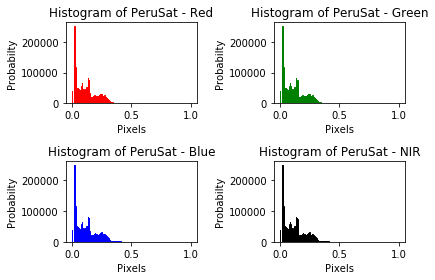

min Perusat 0 max Perusat 3521
max Perusat 1.0
/home/jgonzalez/Test_2019/Test_network/model_HR/data_HR/data/images/rgbnir66144-2560.npy
[[[ 613  536  537  783]
  [ 555  493  504  757]
  [ 524  469  488  772]
  ...
  [ 282  376  351 1122]
  [ 230  348  321 1232]
  [ 221  335  327 1226]]

 [[ 509  474  469  786]
  [ 486  437  460  776]
  [ 481  423  455  788]
  ...
  [ 250  368  346 1272]
  [ 211  346  327 1312]
  [ 203  323  325 1306]]

 [[ 411  408  403  764]
  [ 413  401  409  803]
  [ 402  388  408  805]
  ...
  [ 224  347  335 1427]
  [ 201  337  327 1360]
  [ 201  314  325 1401]]

 ...

 [[ 661  585  554  835]
  [ 636  563  540  831]
  [ 616  557  536  835]
  ...
  [   0    0    0    0]
  [   0    0    0    0]
  [   0    0    0    0]]

 [[ 657  571  548  841]
  [ 649  564  544  827]
  [ 637  562  543  828]
  ...
  [   0    0    0    0]
  [   0    0    0    0]
  [   0    0    0    0]]

 [[ 640  562  539  841]
  [ 655  571  547  821]
  [ 651  571  547  822]
  ...
  [   0    0    0   

In [10]:
## data_HR data is all the data_HR
#test_path= "data_HR/train/images" ###cambiar a train
test_path= '/home/jgonzalez/Test_2019/Test_network/model_HR/data_HR/data/images'  


get_files_path = test_path + "/*.npy"
file_names = np.array(sorted(glob.glob(get_files_path)))

minimo_pixel=[]
maximo_pixel=[]
maximo_pixel_nor=[]

print(len(file_names))
fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flatten()
for i in file_names:
    img = np.load(str(i))#/3521
    #print(np.max(img))
    img=img.transpose((1, 2, 0))
    img_nor=img/3521

    minimo_pixel.append(np.min(img))
    maximo_pixel.append(np.max(img))
    maximo_pixel_nor.append(np.max(img_nor))

        
    #ax0.hist(img[:,:,0].ravel(), bins=4000, range=(0.0, 4000.0), fc='none', ec='r', histtype='step') #it could be 655536
    #ax1.hist(img[:,:,1].ravel(), bins=4000, range=(0.0, 4000.0), fc='none', ec='g', histtype='step') #it could be 655536
    #ax2.hist(img[:,:,2].ravel(), bins=4000, range=(0.0, 4000.0), fc='none', ec='b', histtype='step') #it could be 655536
    #ax3.hist(img[:,:,3].ravel(), bins=4000, range=(0.0, 4000.0), fc='none', ec='k', histtype='step') #it could be 655536

    ax0.hist((img[:,:,0]/3521).ravel(), bins=256, range=(0.0, 1.0), fc='none', ec='r', histtype='step') #it could be 655536
    ax1.hist((img[:,:,0]/3521).ravel(), bins=256, range=(0.0, 1.0), fc='none', ec='g', histtype='step') #it could be 655536
    ax2.hist((img[:,:,0]/3521).ravel(), bins=256, range=(0.0, 1.0), fc='none', ec='b', histtype='step') #it could be 655536
    ax3.hist((img[:,:,0]/3521).ravel(), bins=256, range=(0.0, 1.0), fc='none', ec='k', histtype='step') #it could be 655536
#plt.hist((img[:,:,0]/3521).ravel(), bins=256, range=(0.0, 1.0), fc='none', ec='r', histtype='step') #it could be 655536

ax0.set_xlabel('Pixels')
ax1.set_xlabel('Pixels')
ax2.set_xlabel('Pixels')
ax3.set_xlabel('Pixels')

ax0.set_ylabel('Probabilty')
ax1.set_ylabel('Probabilty')
ax2.set_ylabel('Probabilty')
ax3.set_ylabel('Probabilty')

ax0.set_title('Histogram of PeruSat - Red')
ax1.set_title('Histogram of PeruSat - Green')
ax2.set_title('Histogram of PeruSat - Blue')
ax3.set_title('Histogram of PeruSat - NIR')


fig.tight_layout()
plt.xlabel('Pixels')
plt.ylabel('Probabilty')
plt.show()
fig.savefig("histogram_Perusat_train_65536.pdf", bbox_inches='tight')


print('min Perusat',np.min(minimo_pixel),'max Perusat',np.max(maximo_pixel)) # 0-3521
print('max Perusat',np.max(maximo_pixel_nor)) # 0-1

print(i)
print(img, img_nor,np.shape(img_nor))


## Test in one image

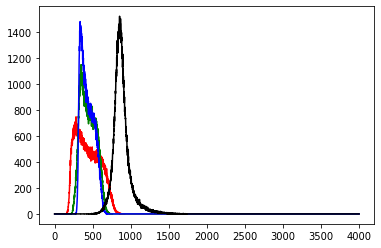

In [42]:
    color = ('r','g','b','k')
    for i,col in enumerate(color):
        histr = cv2.calcHist([img],[i],None,[4000],[0,4000])
        plt.plot(histr,color = col)
        #plt.xlim([0,4000])
    plt.show()

In [27]:
print(np.shape(img),np.min(img),np.max(img))

(512, 512, 4) 155 1744


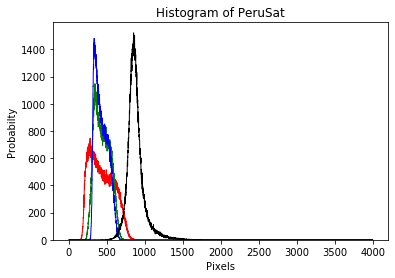

In [65]:
plt.hist(img[:,:,0].ravel(), bins=4000, range=(0.0, 4000.0), fc='none', ec='r', histtype='step') #it could be 655536
plt.hist(img[:,:,1].ravel(), bins=4000, range=(0.0, 4000.0), fc='none', ec='g', histtype='step') #it could be 655536
plt.hist(img[:,:,2].ravel(), bins=4000, range=(0.0, 4000.0), fc='none', ec='b', histtype='step') #it could be 655536
plt.hist(img[:,:,3].ravel(), bins=4000, range=(0.0, 4000.0), fc='none', ec='k', histtype='step') #it could be 655536

plt.xlabel('Pixels')
plt.ylabel('Probabilty')
plt.title('Histogram of PeruSat')
pyplot.show()

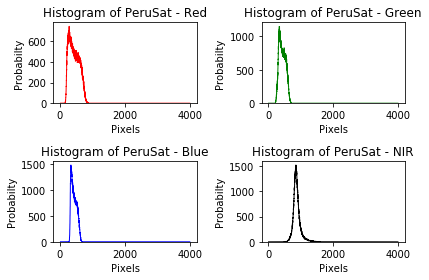

In [56]:
##https://matplotlib.org/3.1.1/gallery/statistics/histogram_multihist.html
#https://matplotlib.org/3.1.0/gallery/pyplots/fig_axes_labels_simple.html

fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flatten()

ax0.hist(img[:,:,0].ravel(), bins=4000, range=(0.0, 4000.0), fc='none', ec='r', histtype='step') #it could be 655536
ax1.hist(img[:,:,1].ravel(), bins=4000, range=(0.0, 4000.0), fc='none', ec='g', histtype='step') #it could be 655536
ax2.hist(img[:,:,2].ravel(), bins=4000, range=(0.0, 4000.0), fc='none', ec='b', histtype='step') #it could be 655536
ax3.hist(img[:,:,3].ravel(), bins=4000, range=(0.0, 4000.0), fc='none', ec='k', histtype='step') #it could be 655536

ax0.set_xlabel('Pixels')
ax1.set_xlabel('Pixels')
ax2.set_xlabel('Pixels')
ax3.set_xlabel('Pixels')

ax0.set_ylabel('Probabilty')
ax1.set_ylabel('Probabilty')
ax2.set_ylabel('Probabilty')
ax3.set_ylabel('Probabilty')

ax0.set_title('Histogram of PeruSat - Red')
ax1.set_title('Histogram of PeruSat - Green')
ax2.set_title('Histogram of PeruSat - Blue')
ax3.set_title('Histogram of PeruSat - NIR')


fig.tight_layout()
plt.xlabel('Pixels')
plt.ylabel('Probabilty')
plt.show()
#https://matplotlib.org/3.1.1/gallery/statistics/histogram_multihist.html

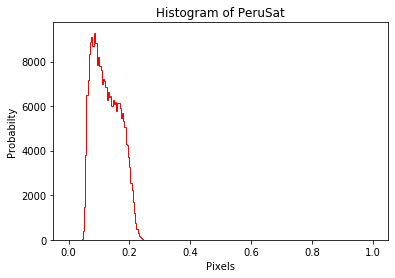

In [68]:
plt.hist((img[:,:,0]/3521).ravel(), bins=256, range=(0.0, 1.0), fc='none', ec='r', histtype='step') #it could be 655536

#plt.hist(image_name[:,:,3].ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')

plt.xlabel('Pixels')
plt.ylabel('Probabilty')
plt.title('Histogram of PeruSat')
pyplot.show()

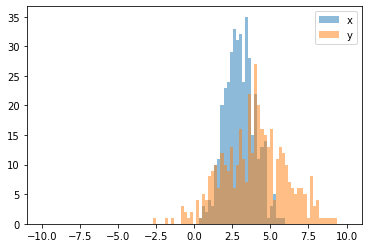

In [43]:
import random
import numpy as np
from matplotlib import pyplot

x = [random.gauss(3,1) for _ in range(400)]
y = [random.gauss(4,2) for _ in range(400)]

bins = np.linspace(-10, 10, 100)


pyplot.hist(x, bins, alpha=0.5, label='x')
pyplot.hist(y, bins, alpha=0.5, label='y')
pyplot.legend(loc='upper right')
pyplot.show()